In [ ]:
from omrdatasettools.Downloader import Downloader
from omrdatasettools.OmrDataset import OmrDataset
from omrdatasettools.MuscimaPlusPlusSymbolImageGenerator import MuscimaPlusPlusSymbolImageGenerator

The downloader module is used to extract the raw information about the datasets into the ./data folder

In [ ]:
downloader = Downloader()

In [ ]:
downloader.download_and_extract_dataset(OmrDataset.MuscimaPlusPlus_V2, "data/muscima_pp_v2")

The generated raw files are then used to draw the images of the dataset on canvases and store them in different folders.

In [ ]:
muscima_generator = MuscimaPlusPlusSymbolImageGenerator()
muscima_generator.extract_and_render_all_symbol_masks("./data/muscima_pp_v2/", "./data/muscima_pp_v2_symbols/")


Before training the models, the images first have to be resized to be a standard size.

First, let's find out what the max height and width is, and use those values to resize all the images

In [ ]:
from PIL import Image
import os

# Specify the root folder containing your images
root_folder = ".\\data\\muscima_pp_v2_symbols"

# Desired width to search for
desired_width = 861

# Initialize a list to store image file paths that match the desired width
matching_images = []

# Iterate through all subfolders and their images
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)
            _, height = image.size
            if height == desired_width:
                matching_images.append(image_path)

# Print the paths of images with the desired width
if matching_images:
    print("Images with a width of 1153 pixels:")
    for image_path in matching_images:
        print(image_path)
else:
    print("No images with a width of 1153 pixels found.")

In [1]:
from PIL import Image
import os

# Specify the root folder containing subfolders with images
root_folder = ".\\data\\muscima_pp_v2_symbols"

# Initialize variables to store maximum width and height
max_width = 0
max_height = 0

# Iterate through all subfolders and their images to find maximum width and height
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)
            width, height = image.size
            max_width = max(max_width, width)
            max_height = max(max_height, height)

# Iterate through all subfolders and their images again and pad them
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)
            
            # Calculate padding dimensions
            padding_width = max_width - image.width
            padding_height = max_height - image.height
            
            # Create a new image with white padding
            padded_image = Image.new("RGB", (max_width, max_height), (255, 255, 255))
            
            # Calculate the position to paste the original image (centered)
            paste_x = padding_width // 2
            paste_y = padding_height // 2
            
            # Paste the original image onto the padded image
            padded_image.paste(image, (paste_x, paste_y))
            
            # Save the padded image, overwriting the original
            padded_image.save(image_path)

print("All images in subfolders have been resized to the maximum width and height.")

All images in subfolders have been resized to the maximum width and height.


At this stage, the images are quite large. To aid in training, we can reduce the size by 50%.

In [2]:
from PIL import Image
import os

# Specify the root folder containing the padded images
root_folder = ".\\data\\muscima_pp_v2_symbols"

# Initialize the output folder
output_root_folder = ".\\data\\muscima_pp_v2_symbols_resized"

# Create the output root folder if it doesn't exist
if not os.path.exists(output_root_folder):
    os.makedirs(output_root_folder)

# Specify the scale factor for resizing (50% in this case)
scale_factor = 0.5

# Iterate through all subfolders and their images
for foldername, subfolders, filenames in os.walk(root_folder):
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)

    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)

            # Calculate the new dimensions while preserving aspect ratio
            width, height = image.size
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)

            # Resize the image
            resized_image = image.resize((new_width, new_height))

            # Save the resized image to the corresponding output subfolder
            output_path = os.path.join(output_folder, filename)
            resized_image.save(output_path)

print("All images in subfolders have been resized to 50% of their size while preserving aspect ratio and stored in corresponding output subfolders.")

All images in subfolders have been resized to 50% of their size while preserving aspect ratio and stored in corresponding output subfolders.


We can also try to supplement the dataset by rotating the images 10, -10, 15 and -15 degrees.

In [3]:
import os

root_folder = ".\\data\\muscima_pp_v2_symbols_resized"

output_root_folder = ".\\data\\muscima_pp_v2_symbols_resized_rotated"

# This list can be extended with more degrees as needed
rotate_degrees = [10, 15, -10, -15] 

for foldername, subfolders, filenames in os.walk(root_folder):
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in filenames:
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            image = Image.open(image_path)

            # Get image dimensions
            height, width = image.size

            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

            for degree in rotate_degrees:
                new_image = image.rotate(degree, fillcolor=(255, 255, 255))

                # Get the original file extension
                file_extension = os.path.splitext(filename)[-1]

                # Save the rotated image with a new filename in the output folder
                new_filename = filename.replace(file_extension, f"_rotated{degree}{file_extension}")
                new_image_path = os.path.join(output_folder, new_filename)
                new_image.save(new_image_path)

It may also be useful to randomly add images where some features are missing to the training dataset, to avoid overfitting.

In [18]:
from PIL import Image, ImageDraw
import random
import os

root_folder = ".\\data\\train"

output_root_folder = ".\\data\\train_cut"

for foldername, subfolders, filenames in os.walk(root_folder):
    x = 10  # Change this to the desired number of random numbers, i.e., the number of images to cut

    # Generate x random numbers between 0 and 99
    random_numbers = [random.randint(0, 99) for _ in range(x)]
    
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in filenames:
        if (filenames.index(filename) in random_numbers) and filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)

            # Get the dimensions of the image
            width, height = image.size
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

            # Create a new blank image with the same size and white background
            output_image = Image.new("RGB", (width, height), "white")

            # Create a draw object to manipulate the new image
            draw = ImageDraw.Draw(output_image)

            # Define the coordinates for the top half of the image
            top_half = (0, 0, width, height // 2)

            # Paste the top half of the input image onto the new image
            output_image.paste(image.crop(top_half))

            file_extension = os.path.splitext(filename)[-1]

            # Save the cut image with a new filename in the output folder
            new_filename = filename.replace(file_extension, f"_cut{file_extension}")
            new_image_path = os.path.join(output_folder, new_filename)
            # Save the resulting image
            output_image.save(new_image_path)

            # Close the input and output images
            image.close()
            output_image.close()
        else:
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

Salt and Pepper noise can also be added to a random selection of images.

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import random
import os

root_folder = ".\\data\\train_cut"

output_root_folder = ".\\data\\train_salt_and_pepper"

for foldername, subfolders, filenames in os.walk(root_folder):
    x = 10  # Change this to the desired number of random numbers, i.e., the number of images to cut

    # Generate x random numbers between 0 and 99
    random_numbers = [random.randint(0, 99) for _ in range(x)]
    
    # Create the corresponding subfolder structure in the output directory
    relative_folder = os.path.relpath(foldername, root_folder)
    output_folder = os.path.join(output_root_folder, relative_folder)
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in filenames:
        if (filenames.index(filename) in random_numbers) and filename.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

            # Convert the image to a numpy array for easy manipulation
            image_array = np.array(image)

            # Define the probability of adding salt and pepper noise
            noise_probability = 0.02  # You can adjust this value

            # Get the dimensions of the image
            height, width, channels = image_array.shape

            # Generate random noise
            for i in range(height):
                for j in range(width):
                    rand = random.random()
                    if rand < noise_probability / 2:
                        image_array[i, j] = [0, 0, 0]  # Pepper noise
                    elif rand < noise_probability:
                        image_array[i, j] = [255, 255, 255]  # Salt noise

            # Convert the numpy array back to an image
            noisy_image = Image.fromarray(image_array)

            file_extension = os.path.splitext(filename)[-1]

            # Save the cut image with a new filename in the output folder
            new_filename = filename.replace(file_extension, f"_salt_and_pepper{file_extension}")
            new_image_path = os.path.join(output_folder, new_filename)
            # Save the resulting image
            noisy_image.save(new_image_path)

            # Close the input and output images
            image.close()
            noisy_image.close()
        else:
            # Get the full image path
            image_path = os.path.join(foldername, filename)
            # Open the image
            image = Image.open(image_path)
            
            # Save the original image to the output folder
            original_image_path = os.path.join(output_folder, filename)
            image.save(original_image_path)

Now the data is normalised, it is time to split the dataset and train the Convolutional Neural Network (CNN) and the Support Vector Machine (SVM).

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Pre-trained model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os
import numpy as np

First we need to split the data into training, test and validation datasets.

In [2]:
import os
import shutil
import random

# Define the source folder containing subfolders with images
source_folder = ".\\data\\muscima_pp_v2_symbols_resized_rotated"

# Define the destination folders
train_folder = ".\\data\\train"
validation_folder = ".\\data\\validation"
test_folder = ".\\data\\test"

# Define the split ratios (80% train, 10% validation, 10% test)
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Iterate through subfolders in the source folder
for root, dirs, files in os.walk(source_folder):
    # Calculate the number of images to copy for each split
    num_files = len(files)
    num_train = int(num_files * train_ratio)
    num_validation = int(num_files * validation_ratio)
    num_test = num_files - num_train - num_validation

    # Randomly shuffle the files in each subfolder
    random.shuffle(files)

    # Copy files to the destination folders based on the split ratios
    for i, file_name in enumerate(files):
        src_path = os.path.join(root, file_name)
        if i < num_train:
            dest_path = os.path.join(train_folder, root[len(source_folder) + 1:], file_name)
        elif i < num_train + num_validation:
            dest_path = os.path.join(validation_folder, root[len(source_folder) + 1:], file_name)
        else:
            dest_path = os.path.join(test_folder, root[len(source_folder) + 1:], file_name)

        # Ensure the destination directory exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)

        # Copy the file
        shutil.copy(src_path, dest_path)

print("Images have been split and copied to the train, validation, and test folders.")

KeyboardInterrupt: 

Now to make the image generators from the different folders

In [3]:
from PIL import Image
import numpy as np

# Define the path to your dataset directory
train_dir = '.\\data\\train_salt_and_pepper'
test_dir = '.\\data\\test'
validation_dir = '.\\data\\validation'


# Define the size of your input images
input_size = (344, 126)

# Define the batch size
batch_size = 32

# Define the number of classes in your dataset
num_classes = len(os.listdir(train_dir))
print(f"Number of classes: {num_classes}")

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an ImageDataGenerator for validation and test data (without augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split the data into train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Number of classes: 35
Found 27361 images belonging to 35 classes.
Found 3438 images belonging to 35 classes.
Found 3454 images belonging to 35 classes.


First, let's build and compile the CNN model. This will be done by using a pre-trained model for the feature extraction layers, and a softmax layer for the final classification layer.

For the SVM, the same pre-trained model will be used, but the classification layer will be a SVM.

In [4]:
import tensorflow_addons as tfa

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(344, 126, 3))

for layer in base_model.layers:
    layer.trainable = False
    
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# The final softmax layer for the CNN classifier
output = Dense(num_classes, activation='softmax')(x)

output_svm = Dense(num_classes, activation='linear')(x)

f1score = tfa.metrics.F1Score(num_classes=num_classes, average='weighted')

cnn = Model(inputs=base_model.input, outputs=output)

svm = Model(inputs=base_model.input, outputs=output_svm)

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', 
                    tf.keras.metrics.Precision(), 
                    tf.keras.metrics.Recall(), 
                    f1score,
                    tf.keras.metrics.AUC(),
                    tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

svm.compile(optimizer='adam',
            loss='hinge',
            metrics=['accuracy',
                    tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    f1score,
                    tf.keras.metrics.AUC(),
                    tf.keras.metrics.TopKCategoricalAccuracy(k=5)])


c:\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


After compilation, we can train the model using the test and validation sets. These results are then stored in cnn_history. After this, the model is evaluated using the test set.

In [20]:
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# start a new wandb run to track this script
wandb.init(project="Recognition of expressive symbols in handwritten sheet music")

wandb.config.epochs = 13
wandb.config.batch_size = batch_size


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Train the model
cnn_history = cnn.fit(
    train_generator,
    epochs=13,
    validation_data=validation_generator,
    callbacks=[early_stop, 
                WandbMetricsLogger(log_freq=5),
                WandbModelCheckpoint("models")]
)


#Evaluate the model using the test set
test_results = cnn.evaluate(test_generator)
print("Test loss:", test_results[0])
print("Test accuracy:", test_results[1])

wandb.log({"test_loss": test_results[0], "test_accuracy": test_results[1]})

wandb.finish()

batch/accuracy,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████▇██████
batch/auc,▁▅▆▇▇▇▇▇████████████████████████████████
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/f1_score,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇▇█████████████
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▅▄▃▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/precision,▁▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████
batch/recall,▁▃▄▅▅▅▆▆▇▇▇▇▇▇▇▇██▇██▇▇▇████████████████
batch/top_k_categorical_accuracy,▁▄▅▆▆▆▇▇████████████████████████████████
epoch/accuracy,▁▅▇██
epoch/auc,▁▇▇██


Epoch 1/13
856/856 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.6680 - precision_3: 0.6931 - recall_3: 0.6404 - f1_score: 0.6073 - auc_3: 0.9902 - top_k_categorical_accuracy: 0.9876 INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 3.1s


856/856 [==============================] - 14926s 17s/step - loss: 0.6954 - accuracy: 0.6680 - precision_3: 0.6931 - recall_3: 0.6404 - f1_score: 0.6073 - auc_3: 0.9902 - top_k_categorical_accuracy: 0.9876 - val_loss: 0.5899 - val_accuracy: 0.7033 - val_precision_3: 0.7142 - val_recall_3: 0.6841 - val_f1_score: 0.6213 - val_auc_3: 0.9926 - val_top_k_categorical_accuracy: 0.9962
Epoch 2/13
856/856 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.6770 - precision_3: 0.6994 - recall_3: 0.6496 - f1_score: 0.6070 - auc_3: 0.9906 - top_k_categorical_accuracy: 0.9891INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 2.4s


856/856 [==============================] - 4534s 5s/step - loss: 0.6780 - accuracy: 0.6770 - precision_3: 0.6994 - recall_3: 0.6496 - f1_score: 0.6070 - auc_3: 0.9906 - top_k_categorical_accuracy: 0.9891 - val_loss: 0.6057 - val_accuracy: 0.7030 - val_precision_3: 0.7175 - val_recall_3: 0.6847 - val_f1_score: 0.6206 - val_auc_3: 0.9920 - val_top_k_categorical_accuracy: 0.9959
Epoch 3/13
856/856 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.6787 - precision_3: 0.7022 - recall_3: 0.6542 - f1_score: 0.6106 - auc_3: 0.9910 - top_k_categorical_accuracy: 0.9893INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.9s


856/856 [==============================] - 4985s 6s/step - loss: 0.6685 - accuracy: 0.6787 - precision_3: 0.7022 - recall_3: 0.6542 - f1_score: 0.6106 - auc_3: 0.9910 - top_k_categorical_accuracy: 0.9893 - val_loss: 0.6166 - val_accuracy: 0.7059 - val_precision_3: 0.7177 - val_recall_3: 0.6891 - val_f1_score: 0.6228 - val_auc_3: 0.9926 - val_top_k_categorical_accuracy: 0.9953
Epoch 4/13
856/856 [==============================] - ETA: 0s - loss: 0.6599 - accuracy: 0.6824 - precision_3: 0.7050 - recall_3: 0.6579 - f1_score: 0.6132 - auc_3: 0.9908 - top_k_categorical_accuracy: 0.9914

KeyboardInterrupt: 

After this, the model can be saved for later reference.

In [21]:
cnn.save('.\\models\\cnn_pre-trained_epoch4.keras')

In [19]:
cnn = tf.keras.models.load_model(".\\models\\cnn_pre-trained_2.keras")

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy',
                    tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    f1score,
                    tf.keras.metrics.AUC(),
                    tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

In [10]:
svm = tf.keras.models.load_model(".\\models\\svm_pre-trained_1.keras")

svm.compile(optimizer='adam',
            loss='hinge',
            metrics=['accuracy',
                    tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                    f1score,
                    tf.keras.metrics.AUC(),
                    tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

We can do the same for the SVM classifier.

In [11]:
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# start a new wandb run to track this script
wandb.init(project="Recognition of expressive symbols in handwritten sheet music")

wandb.config.epochs = 13
wandb.config.batch_size = batch_size

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

svm_history = svm.fit(
    train_generator,
    epochs=13,
    validation_data=validation_generator,
    callbacks=[early_stop, 
                WandbMetricsLogger(log_freq=5),
                WandbModelCheckpoint("models")]
)

#Evaluate the model using the test set
test_results = cnn.evaluate(test_generator)
print("Test loss:", test_results[0])
print("Test accuracy:", test_results[1])

wandb.log({"test_loss": test_results[0], "test_accuracy": test_results[1]})

wandb.finish()

batch/accuracy,▁▃▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████████
batch/auc_1,▁▂▃▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/f1_score,▁▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/precision_1,▁▁▂▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████████
batch/recall_1,▂▁▂▃▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████████
batch/top_k_categorical_accuracy,▁▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇████████████████████████
batch/accuracy,0.54344
batch/auc_1,0.70348


Epoch 1/13
856/856 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.6079 - precision_2: 0.6843 - recall_2: 0.4521 - f1_score: 0.5210 - auc_2: 0.7590 - top_k_categorical_accuracy: 0.9249INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 2.8s


856/856 [==============================] - 2682s 3s/step - loss: 0.0463 - accuracy: 0.6079 - precision_2: 0.6843 - recall_2: 0.4521 - f1_score: 0.5210 - auc_2: 0.7590 - top_k_categorical_accuracy: 0.9249 - val_loss: 0.0427 - val_accuracy: 0.6463 - val_precision_2: 0.6920 - val_recall_2: 0.4802 - val_f1_score: 0.5604 - val_auc_2: 0.7666 - val_top_k_categorical_accuracy: 0.9514
Epoch 2/13
856/856 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.6297 - precision_2: 0.6908 - recall_2: 0.4996 - f1_score: 0.5404 - auc_2: 0.7749 - top_k_categorical_accuracy: 0.9460INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.9s


856/856 [==============================] - 2764s 3s/step - loss: 0.0438 - accuracy: 0.6297 - precision_2: 0.6908 - recall_2: 0.4996 - f1_score: 0.5404 - auc_2: 0.7749 - top_k_categorical_accuracy: 0.9460 - val_loss: 0.0385 - val_accuracy: 0.6684 - val_precision_2: 0.7132 - val_recall_2: 0.5844 - val_f1_score: 0.5775 - val_auc_2: 0.8052 - val_top_k_categorical_accuracy: 0.9695
Epoch 3/13
856/856 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.6468 - precision_2: 0.7008 - recall_2: 0.5385 - f1_score: 0.5578 - auc_2: 0.7914 - top_k_categorical_accuracy: 0.9569INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.7s


856/856 [==============================] - 2825s 3s/step - loss: 0.0417 - accuracy: 0.6468 - precision_2: 0.7008 - recall_2: 0.5385 - f1_score: 0.5578 - auc_2: 0.7914 - top_k_categorical_accuracy: 0.9569 - val_loss: 0.0391 - val_accuracy: 0.6803 - val_precision_2: 0.7128 - val_recall_2: 0.5890 - val_f1_score: 0.5897 - val_auc_2: 0.8092 - val_top_k_categorical_accuracy: 0.9814
Epoch 4/13
856/856 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.6528 - precision_2: 0.7052 - recall_2: 0.5521 - f1_score: 0.5638 - auc_2: 0.7972 - top_k_categorical_accuracy: 0.9592INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.8s


856/856 [==============================] - 2931s 3s/step - loss: 0.0412 - accuracy: 0.6528 - precision_2: 0.7052 - recall_2: 0.5521 - f1_score: 0.5638 - auc_2: 0.7972 - top_k_categorical_accuracy: 0.9592 - val_loss: 0.0372 - val_accuracy: 0.6812 - val_precision_2: 0.7263 - val_recall_2: 0.6213 - val_f1_score: 0.5881 - val_auc_2: 0.8238 - val_top_k_categorical_accuracy: 0.9788
Epoch 5/13
856/856 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.6548 - precision_2: 0.7092 - recall_2: 0.5633 - f1_score: 0.5663 - auc_2: 0.8009 - top_k_categorical_accuracy: 0.9611INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 4.2s


856/856 [==============================] - 2702s 3s/step - loss: 0.0406 - accuracy: 0.6548 - precision_2: 0.7092 - recall_2: 0.5633 - f1_score: 0.5663 - auc_2: 0.8009 - top_k_categorical_accuracy: 0.9611 - val_loss: 0.0391 - val_accuracy: 0.6754 - val_precision_2: 0.7197 - val_recall_2: 0.5974 - val_f1_score: 0.5900 - val_auc_2: 0.8168 - val_top_k_categorical_accuracy: 0.9770
Epoch 6/13
856/856 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.6644 - precision_2: 0.7117 - recall_2: 0.5800 - f1_score: 0.5764 - auc_2: 0.8072 - top_k_categorical_accuracy: 0.9666INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 2.0s


856/856 [==============================] - 2602s 3s/step - loss: 0.0395 - accuracy: 0.6644 - precision_2: 0.7117 - recall_2: 0.5800 - f1_score: 0.5764 - auc_2: 0.8072 - top_k_categorical_accuracy: 0.9666 - val_loss: 0.0374 - val_accuracy: 0.6786 - val_precision_2: 0.7223 - val_recall_2: 0.6303 - val_f1_score: 0.5852 - val_auc_2: 0.8264 - val_top_k_categorical_accuracy: 0.9741
Epoch 7/13
856/856 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.6641 - precision_2: 0.7129 - recall_2: 0.5842 - f1_score: 0.5769 - auc_2: 0.8076 - top_k_categorical_accuracy: 0.9650INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.7s


856/856 [==============================] - 2643s 3s/step - loss: 0.0394 - accuracy: 0.6641 - precision_2: 0.7129 - recall_2: 0.5842 - f1_score: 0.5769 - auc_2: 0.8076 - top_k_categorical_accuracy: 0.9650 - val_loss: 0.0377 - val_accuracy: 0.6792 - val_precision_2: 0.7284 - val_recall_2: 0.6099 - val_f1_score: 0.5890 - val_auc_2: 0.8249 - val_top_k_categorical_accuracy: 0.9727
Epoch 8/13
856/856 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.6608 - precision_2: 0.7129 - recall_2: 0.5818 - f1_score: 0.5729 - auc_2: 0.8066 - top_k_categorical_accuracy: 0.9667INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.8s


856/856 [==============================] - 2600s 3s/step - loss: 0.0395 - accuracy: 0.6608 - precision_2: 0.7129 - recall_2: 0.5818 - f1_score: 0.5729 - auc_2: 0.8066 - top_k_categorical_accuracy: 0.9667 - val_loss: 0.0368 - val_accuracy: 0.6847 - val_precision_2: 0.7230 - val_recall_2: 0.6323 - val_f1_score: 0.5945 - val_auc_2: 0.8266 - val_top_k_categorical_accuracy: 0.9785
Epoch 9/13
856/856 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.6650 - precision_2: 0.7128 - recall_2: 0.5875 - f1_score: 0.5772 - auc_2: 0.8093 - top_k_categorical_accuracy: 0.9681INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.9s


856/856 [==============================] - 2873s 3s/step - loss: 0.0390 - accuracy: 0.6650 - precision_2: 0.7128 - recall_2: 0.5875 - f1_score: 0.5772 - auc_2: 0.8093 - top_k_categorical_accuracy: 0.9681 - val_loss: 0.0382 - val_accuracy: 0.6763 - val_precision_2: 0.7176 - val_recall_2: 0.6105 - val_f1_score: 0.5870 - val_auc_2: 0.8212 - val_top_k_categorical_accuracy: 0.9776
Epoch 10/13
856/856 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.6683 - precision_2: 0.7168 - recall_2: 0.5918 - f1_score: 0.5806 - auc_2: 0.8111 - top_k_categorical_accuracy: 0.9695INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.8s


856/856 [==============================] - 2895s 3s/step - loss: 0.0385 - accuracy: 0.6683 - precision_2: 0.7168 - recall_2: 0.5918 - f1_score: 0.5806 - auc_2: 0.8111 - top_k_categorical_accuracy: 0.9695 - val_loss: 0.0365 - val_accuracy: 0.6914 - val_precision_2: 0.7267 - val_recall_2: 0.6227 - val_f1_score: 0.6030 - val_auc_2: 0.8238 - val_top_k_categorical_accuracy: 0.9808
Epoch 11/13
856/856 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.6690 - precision_2: 0.7174 - recall_2: 0.5965 - f1_score: 0.5821 - auc_2: 0.8114 - top_k_categorical_accuracy: 0.9661INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 3.7s


856/856 [==============================] - 2896s 3s/step - loss: 0.0387 - accuracy: 0.6690 - precision_2: 0.7174 - recall_2: 0.5965 - f1_score: 0.5821 - auc_2: 0.8114 - top_k_categorical_accuracy: 0.9661 - val_loss: 0.0385 - val_accuracy: 0.6693 - val_precision_2: 0.7221 - val_recall_2: 0.5881 - val_f1_score: 0.5834 - val_auc_2: 0.8084 - val_top_k_categorical_accuracy: 0.9639
Epoch 12/13
856/856 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.6658 - precision_2: 0.7148 - recall_2: 0.5926 - f1_score: 0.5779 - auc_2: 0.8106 - top_k_categorical_accuracy: 0.9678INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 2.0s


856/856 [==============================] - 2816s 3s/step - loss: 0.0387 - accuracy: 0.6658 - precision_2: 0.7148 - recall_2: 0.5926 - f1_score: 0.5779 - auc_2: 0.8106 - top_k_categorical_accuracy: 0.9678 - val_loss: 0.0383 - val_accuracy: 0.6806 - val_precision_2: 0.7227 - val_recall_2: 0.5791 - val_f1_score: 0.5933 - val_auc_2: 0.8160 - val_top_k_categorical_accuracy: 0.9770
Epoch 13/13
856/856 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.6748 - precision_2: 0.7194 - recall_2: 0.6024 - f1_score: 0.5872 - auc_2: 0.8149 - top_k_categorical_accuracy: 0.9705INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets
wandb: Adding directory to artifact (.\models)... Done. 1.9s


108/108 [==============================] - 459s 4s/step - loss: 5.5728 - accuracy: 0.0197 - precision: 0.0116 - recall: 2.8952e-04 - f1_score: 0.4029 - auc: 0.3551 - top_k_categorical_accuracy: 0.0510
Test loss: 5.572769641876221
Test accuracy: 0.019687319174408913


batch/accuracy,▁▁▂▄▄▄▅▅▅▅▆▆▆▆▆▇▆▇▇▇▇▇▆▇▆█▇▇█▇▇██▇▆▇▇▆▇█
batch/auc_2,▁▂▂▃▃▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇██▇███▇▇▇▇▇█
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/f1_score,▁▁▁▃▃▃▄▅▅▅▅▅▅▅▅▇▆▆▇▇▇▇▆▆▆█▇▇█▇▇██▇▅▆▇▆▇▇
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▇▇▅▅▅▄▃▄▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▂▂▁▁▂▁▁▁▂▂▂▂▁▁
batch/precision_2,▂▂▁▄▃▃▁▅▄▄▄▄▅▅▅▇▅▅▆▆▆▇▆▆▆█▆▆█▇▇█▇▇▄▆▆▅▇▇
batch/recall_2,▁▂▃▃▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇██▇███▇▇▇▇██
batch/top_k_categorical_accuracy,▁▂▃▅▅▅▆▆▆▆▇▆▇▆▇▆▇▇▇██▇▇▇▇██▇██████▇▇▇▇██
epoch/accuracy,▁▃▅▆▆▇▇▇▇▇▇▇█
epoch/auc_2,▁▃▅▆▆▇▇▇▇██▇█


In [12]:
#Evaluate the model using the test set
test_results = svm.evaluate(test_generator)
print("Test loss:", test_results[0])
print("Test accuracy:", test_results[1])

108/108 [==============================] - 243s 2s/step - loss: 0.0380 - accuracy: 0.6789 - precision_2: 0.7184 - recall_2: 0.6129 - f1_score: 0.5923 - auc_2: 0.8213 - top_k_categorical_accuracy: 0.9835
Test loss: 0.03796811401844025
Test accuracy: 0.6789230108261108


In [13]:
svm.save('.\\models\\svm_pre-trained_2.keras')

We can also use matplotlib to visualise the training progress by using the "cnn_history" variable to plot the training and validation accuracy and loss over time.

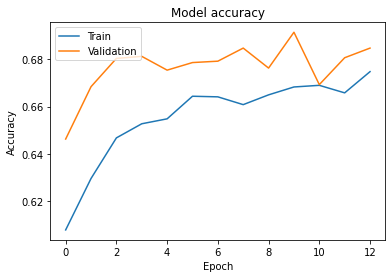

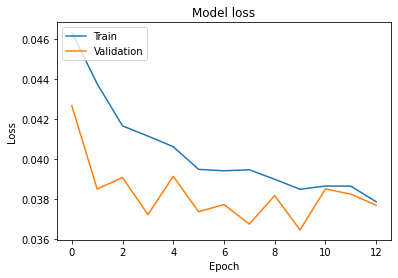

In [16]:


plt.plot(svm_history.history['accuracy'])
plt.plot(svm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(svm_history.history['loss'])
plt.plot(svm_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()